In [2]:
from qutip import *
from qutip.piqs import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=BIGGER_SIZE)  

In [5]:
#couplings

chi = 1 
xi = 1 

In [9]:
def run_spin_evolution(N,t, add_linear):
    J=N/2
    M=-J

    Jx = jspin(N, "x")
    Jz = jspin(N,"z")
    Jy = jspin(N, "y")


    system = Dicke(N=N)

    if add_linear==True:
        
        H = 4/chi*Jx*Jx + 4/xi*Jx
    else:
        H = 4/chi*Jx*Jx 

    system.hamiltonian=H
    system.emission=0
    system.dephasing=0
    D_tls = system.liouvillian() 

    rho_0 = dicke(N, J, M)
 
    result = mesolve(D_tls, rho_0, t, [], e_ops = [Jz])
    rhot_tls = result.states
    jzt = result.expect[0]

    return jzt

In [14]:
t = np.linspace(0, 3, 1000)

jztNevenQL= run_spin_evolution(4, t,True);
jztNoddQL = run_spin_evolution(5,t, True);
jztNevenQ = run_spin_evolution(2, t,False);
jztNoddQ = run_spin_evolution(3, t,False);

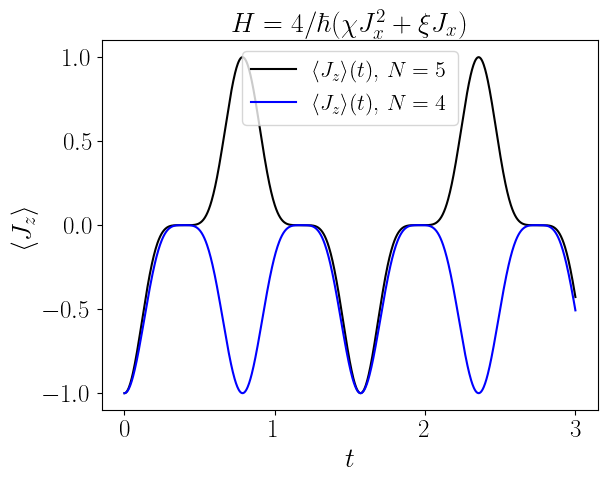

In [15]:

# N=2
# j_max = N/2.
label_size = 20

plt.figure(1)

plt.plot(chi*t, jztNoddQL/2.5, 'k-', label=r'$\langle J_{z}\rangle(t), \, N=5$')
plt.plot(chi*t, jztNevenQL/2, 'b-', label=r'$\langle J_{z}\rangle(t), \, N=4$')
plt.title(r'$H=4/\hbar(\chi J_x^2 + \xi J_x)$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
plt.ylabel(r'$\langle J_{z}\rangle$', fontsize = label_size)
plt.legend( fontsize = 0.8 * label_size)
plt.show()

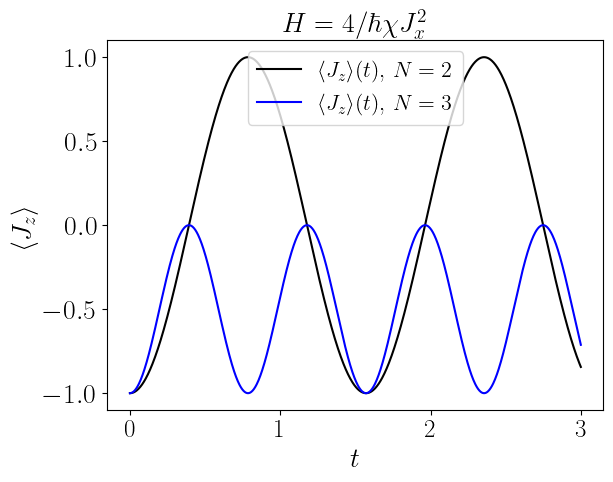

In [181]:
j_max = N/2.
label_size = 20

plt.figure(1)

plt.plot(chi*t, jzt/j_max, 'k-', label=r'$\langle J_{z}\rangle(t), \, N=2$')
plt.plot(chi*t, jztNodd/1.5, 'b-', label=r'$\langle J_{z}\rangle(t), \, N=3$')
plt.title(r'$H=4/\hbar\chi J_x^2$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
plt.ylabel(r'$\langle J_{z}\rangle$', fontsize = label_size)
plt.legend( fontsize = 0.8 * label_size)
plt.show()